In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today().strftime("%Y-%m-%d")

df = yf.download('^GSPC', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-14,5424.080078,5432.390137,5403.750000,5431.600098,5431.600098,3438650000
2024-06-17,5431.109863,5488.500000,5420.399902,5473.229980,5473.229980,3447840000
2024-06-18,5476.149902,5490.379883,5471.319824,5487.029785,5487.029785,3544330000
2024-06-20,5499.990234,5505.529785,5455.560059,5473.169922,5473.169922,3847060000
2024-06-21,5466.770020,5478.310059,5452.029785,5464.620117,5464.620117,6773800000


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1116.560059,1133.869995,1116.560059,1132.989990,3991400000
1,1132.660034,1136.630005,1129.660034,1136.520020,2491020000
2,1135.709961,1139.189941,1133.949951,1137.140015,4972660000
3,1136.270020,1142.459961,1131.319946,1141.689941,5270680000
4,1140.520020,1145.390015,1136.219971,1144.979980,4389590000


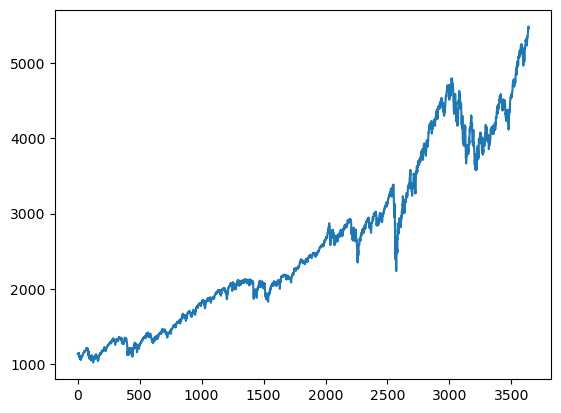

In [6]:
plt.plot(df.Close)

In [7]:
ma20 = df.Close.rolling(20).mean()
ma20

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3636    5327.477979
3637    5335.975977
3638    5344.920972
3639    5352.508960
3640    5360.389478
Name: Close, Length: 3641, dtype: float64

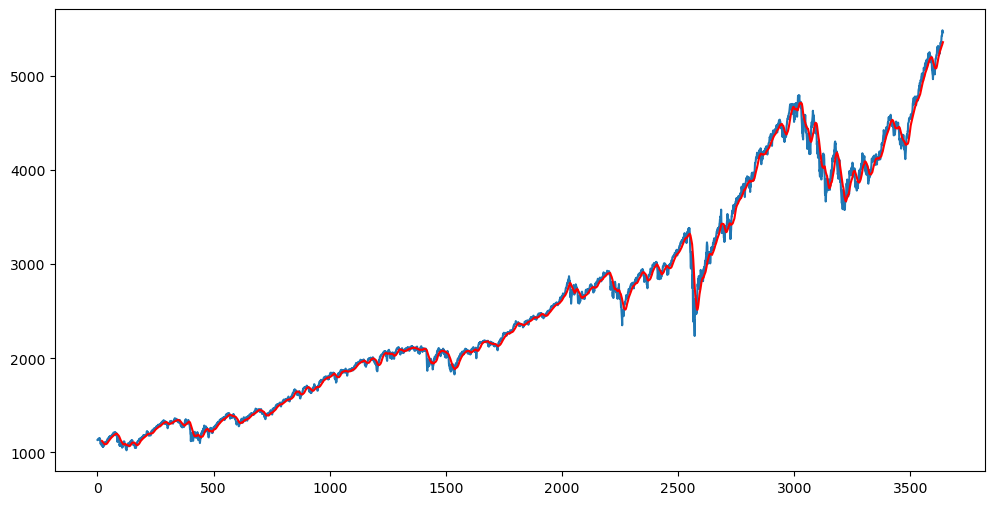

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma20, 'r')

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3636    5143.039097
3637    5149.085898
3638    5155.014595
3639    5160.836592
3640    5166.203491
Name: Close, Length: 3641, dtype: float64

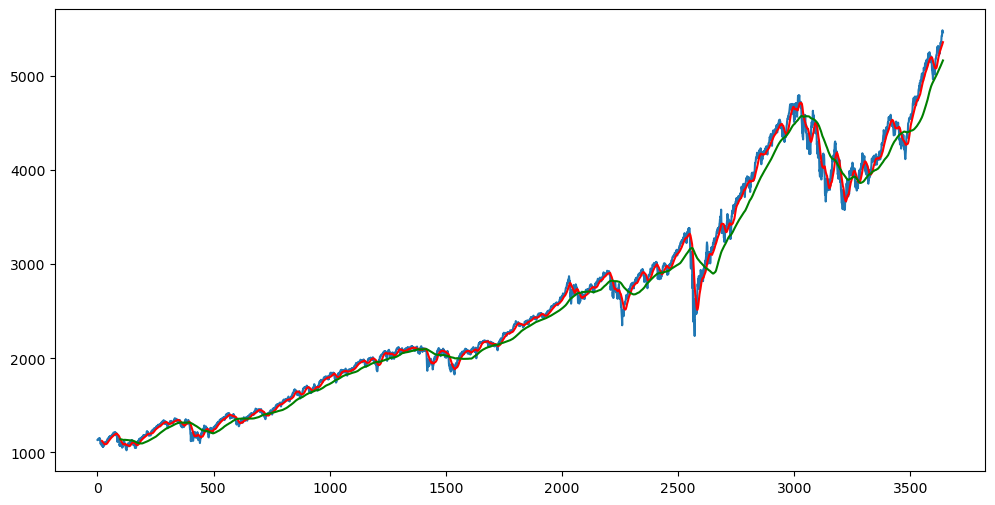

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma20, 'r')
plt.plot(ma100, 'g')

In [11]:
# Chia tập dữ liệu thành training_set và testing_set
n1 = int(len(df)*0.80)
n2 = int(len(df)*0.10)

data_training = pd.DataFrame(df['Close'][0:n1])
data_validating = pd.DataFrame(df['Close'][n1:(n1+n2)])
data_testing = pd.DataFrame(df['Close'][(n1+n2):])

print(data_training.shape)
print(data_validating.shape)
print(data_testing.shape)


(2912, 1)
(364, 1)
(365, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0324762 ],
       [0.03351453],
       [0.03369689],
       ...,
       [1.        ],
       [0.99387013],
       [0.99362898]])

In [14]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [15]:
x_train.shape

(2812, 100, 1)

In [16]:
days = data_training.tail(100)
data_validating = pd.concat([days, data_validating], ignore_index=True)

In [17]:
data_valiadating_array = scaler.fit_transform(data_validating)
data_valiadating_array

array([[0.20033953],
       [0.24469255],
       [0.26385577],
       [0.2970899 ],
       [0.30036986],
       [0.32136143],
       [0.31625292],
       [0.32560911],
       [0.27750849],
       [0.27557343],
       [0.29811489],
       [0.27345779],
       [0.25592635],
       [0.2726378 ],
       [0.32595344],
       [0.32312452],
       [0.31284184],
       [0.32460034],
       [0.36312356],
       [0.4107155 ],
       [0.40746017],
       [0.41238831],
       [0.42650847],
       [0.4524446 ],
       [0.45178076],
       [0.46293228],
       [0.44905014],
       [0.4865726 ],
       [0.49891366],
       [0.48070135],
       [0.45747944],
       [0.48903256],
       [0.45751227],
       [0.49456748],
       [0.50067655],
       [0.49993864],
       [0.49703585],
       [0.52023334],
       [0.49538747],
       [0.50480932],
       [0.48184966],
       [0.48425197],
       [0.51215638],
       [0.53755959],
       [0.50134079],
       [0.47155056],
       [0.39852238],
       [0.439

In [18]:
x_val = []
y_val = []

for i in range(100, data_valiadating_array.shape[0]):
    x_val.append(data_valiadating_array[i-100:i])
    y_val.append(data_valiadating_array[i, 0])

x_val, y_val = np.array(x_val), np.array(y_val)    

In [19]:
x_val.shape

(364, 100, 1)

In [20]:
# ML Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings

tf.get_logger().setLevel('ERROR')

warnings.filterwarnings('ignore')

# Define your model
model = Sequential([
    Bidirectional(GRU(256, activation='relu', input_shape=(x_train.shape[1], 1))),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, activation='relu')
])

model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=50, min_lr=1e-6)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=25,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - loss: 0.0777 - mean_absolute_error: 0.2060 - val_loss: 0.1014 - val_mean_absolute_error: 0.2647 - learning_rate: 0.0010
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.0070 - mean_absolute_error: 0.0603 - val_loss: 0.0827 - val_mean_absolute_error: 0.2428 - learning_rate: 0.0010
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0051 - mean_absolute_error: 0.0552 - val_loss: 0.0816 - val_mean_absolute_error: 0.2380 - learning_rate: 0.0010
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - loss: 0.0042 - mean_absolute_error: 0.0515 - val_loss: 0.0599 - val_mean_absolute_error: 0.2059 - learning_rate: 0.0010
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - loss: 0.0037 - mean_absolute_error: 0.0481 - val_loss: 0.0275 - val_mean_absolute_error: 0.1443 - learning_rate: 0.0010
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - loss: 0.0036 - mean_absolute_error: 0.0501 - val_loss: 0.

In [24]:
model.save('D:\DecisionSupportSystem\Project\Models\SP500_Model15___BiGRU.keras')

In [25]:
data_testing.head()

,Close
3276,3892.090088
3277,3919.250000
3278,3969.610107
3279,3983.169922
3280,3999.090088


In [26]:
past_100_days = data_validating.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.38124097],
       [0.36492675],
       [0.37000539],
       [0.34107332],
       [0.29369648],
       [0.28884818],
       [0.29515187],
       [0.32570166],
       [0.25163871],
       [0.23747651],
       [0.21420415],
       [0.19789006],
       [0.2040943 ],
       [0.18179582],
       [0.17338218],
       [0.21091107],
       [0.22468584],
       [0.25671735],
       [0.27925665],
       [0.1862094 ],
       [0.19318326],
       [0.1698011 ],
       [0.15513094],
       [0.1690366 ],
       [0.14602091],
       [0.11146593],
       [0.09474345],
       [0.06083768],
       [0.04084294],
       [0.03678535],
       [0.0743508 ],
       [0.03321463],
       [0.00449743],
       [0.05308896],
       [0.11198949],
       [0.10798431],
       [0.08769111],
       [0.03279052],
       [0.01851302],
       [0.00618328],
       [0.        ],
       [0.04862822],
       [0.00316232],
       [0.05283766],
       [0.07484292],
       [0.06184811],
       [0.04646597],
       [0.092

In [29]:
input_data.shape

(465, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)    

In [31]:
print(x_test.shape)
print(y_test.shape)

(365, 100, 1)
(365,)


In [32]:
# Making predictions
y_predicted = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step


In [33]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [34]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
mape = (np.abs((y_test - y_predicted) / y_test).mean()) * 100
r2 = r2_score(y_test, y_predicted)

# Đánh giá mô hình
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

MAE: 77.91992923266267
MSE: 7556.715144152022
RMSE: 86.92936870903884
MAPE: 1.7352875497997342%
R²: 0.9606705845294637


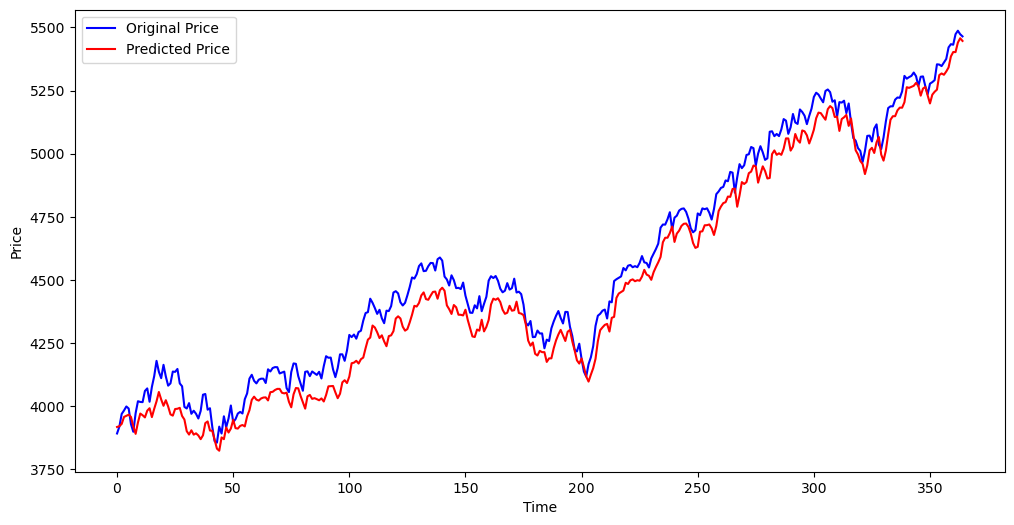

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()